# 线性规划
## 线性规划问题标准式
$$
\underset {x}min c^Tx
$$
$$
 s.t.\left\{
\begin{matrix}
 Ax\leq b \\
 Aeq\cdot x=beq \\
 lb\leq x\leq ub
\end{matrix}
\right.
$$
其中$c,x,b,beq,lb,ub$为列向量，$c$为价值向量，$b$称为资源向量，$A,Aeq$为矩阵。
## 例题：求解下列线性规划问题
$$ max z=2x_1+3x_2-5x_3$$
$$ s.t.\left\{
\begin{matrix}
 x_1+x_2+x_3=7 \\
 2x_1-5x_2+x_3>=10 \\
 x_1+3x_2+x_3<=12 \\
 x_1,x_2,x_3>=0
\end{matrix}
\right.
$$


In [6]:
from scipy import optimize
import numpy as np 
c = np.array([-2,-3,5])
A = np.array([[-2,5,-1],[1,3,1]])
B = np.array([-10,12])
Aeq = np.array([[1,1,1]])
Beq = np.array([7])
res = optimize.linprog(c,A,B,Aeq,Beq)
print(res.fun)
print(res.x)

-14.571428571428571
[6.42857143 0.57142857 0.        ]


## 例题二
### 问题提出
市场上有n 种资产(如股票、债券、…)Si ( i=1,…n) 供投资者选择，某公司有数额为M 的一笔相当大的资金可用作一个时期的投资。公司财务分析人员对这n 种资产进行了评估，估算出在这一时期内购买Si 的平均收益率为 ri，并预测出购买Si的风险损失率为qi 。考虑到投资越分散，总的风险越小，公司确定，当用这笔资金购买若干种资产时，总体风险可用所投资的Si 中最大的一个风险来度量。

购买Si 要付交易费，费率为 pi，并且当购买额不超过给定值 ui时，交易费按购买ui 计算(不买当然无须付费)。另外，假定同期银行存款利率是r0, 且既无交易费又无风险。( r0=5% )

1)已知n = 4 时的相关数据如下：

|Si|ri(%)|qi(%)|pi(%)|ui(元)|
|----|----|----|----|----|
|S1 |   28  |   2.5   |  1     |    103|
|S2  |  21   |  1.5   |  2     |    198|
|S3   | 23     |5.5     |4.5     |  52|
|S4   | 25   | 2.6  |   6.5   |    40|

试给该公司设计一种投资组合方案，即用给定的资金 ，有选择地购买若干种资产或存银行生息，使净收益尽可能大，而总体风险尽可能小。
### 符号规定与基本假设
**符号规定**\
$s_i$表示第$i$种投资项目，如股票、债券等，$i=0,1,L,n$,其中$s_0$指存入银行;\
$r_i,p_i,q_i$分别表示$s_i$的平均收益率，交易费率，风险损失率，$i=0,1,L,n$,其中$p_0=0,q_0=0$;\
$u_i$表示投资项目$s_i$的交易定额，$i=0,1,L,n$;\
$x_i$表示投资项目$s_i$的资金，$i=0,1,L,n$;\
$a$代表投资风险度；\
$Q$代表总体收益；\
**基本假设**\
（1）投资数额$M$相当大，为了便于计算，假设$M$为1；\
（2）投资越分散，总的风险越小；\
（3）总体风险用投资项目$s_i$中最大的一个风险来度量；\
（4）$n+1$种资产$s_i$之间是相互独立的；\
（5）在投资的这一时期内，$r_i,p_i,q_i$为定值，不受意外因素影响；
## 模型的分析与建立
1. 总体风险用所投资的$s_i$种最大的一个风险来衡量，即
$$max{q_ix_i|i=1,2,L,n}.$$
2. 购买$s_i(i=0,1,L,n)$所支付的交易费是一个分段函数，即
$$ 交易费\left\{
\begin{matrix}
p_ix_i,     x_i>ui,\\
p_iu_i,     x_i\leq u_i,
\end{matrix}
\right. $$
而题目中所给的定值$u_i$（单位：元）相对总投资$M$很少,$p_iu_i$更小，这样购买$s_i$的净收益可以简化为$(r_i-p_i)x_i$。
3. 要使净收益尽可能打，总体风险尽可能小，这是一个多目标规划模型。\
目标函数为
$$\left\{
\begin{matrix}
max\sum\limits_{i=0}^n(r_i-p_i)x_i\\
min\, max{q_ix_i}
\end{matrix}
\right.
$$
约束条件为
$$\left\{
\begin{matrix}
\sum\limits_{i=0}^n(1+p_i)x_i=M\\
x_i\geq 0,\, i=0,1...,n
\end{matrix}
\right.
$$
将多目标规划模型转化为线性规划模型\
**模型一**固定风险水平，优化收益
$$max\sum\limits_{i=0}^n(r_i-p_i)x_i$$
$$ s.t.\left\{
\begin{matrix}
 \frac{q_ix_i}M\leq a \\
 \sum\limits_{i=0}^n(1+p_i)x_i=M,\, x_i\geq 0,\, i=0,1,...n 
\end{matrix}
\right.$$
**模型二**固定盈利水平，极小化风险
$$min\lbrace max\lbrace q_ix_i\rbrace \rbrace$$
$$ s.t.\left\{
\begin{matrix}
 \sum\limits_{i=0}^n(r_i-p_i)x_i\geq k\\
 \sum\limits_{i=0}^n(1+p_i)x_i=M,\, x_i\geq 0,\, i=0,1,...n 
\end{matrix}
\right.$$
**模型三** 为风险、收益分别赋予权重s和（1-s），s称为投资偏好
$$min\,s\lbrace max\lbrace q_ix_i\rbrace \rbrace-(1-s)\sum\limits_{i=0}^n(r_i-p_i)x_i$$
$$s.t.\,\sum\limits_{i=0}^n(1+p_i)x_i=M,\, x_i\geq 0,\, i=0,1,...n$$
**模型一的求解**\
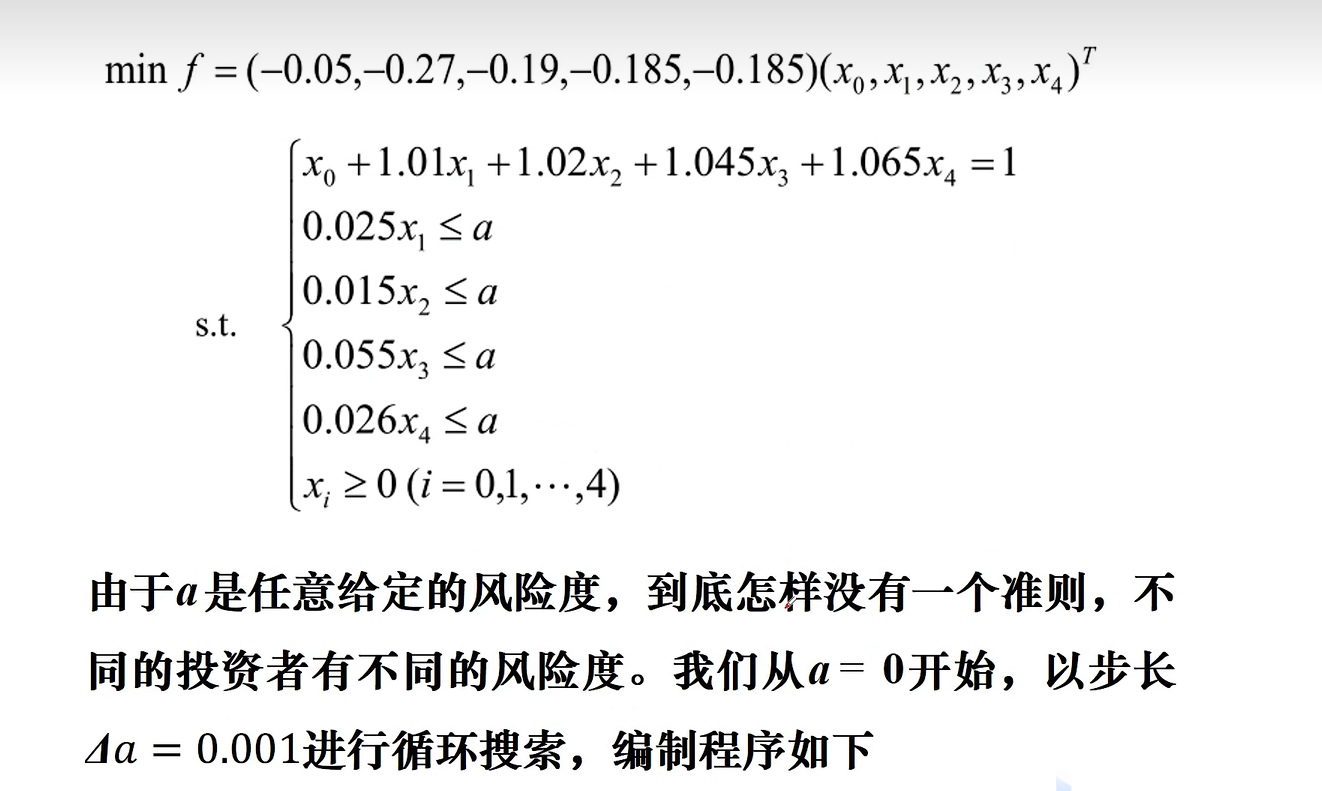

0.2019076397780623 [0.         0.24       0.4        0.10909091 0.22122066]


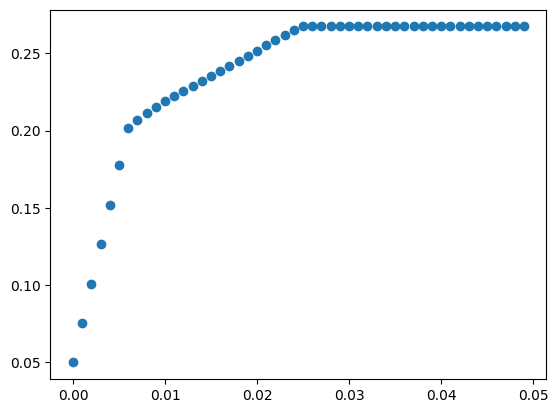

In [20]:
from matplotlib import pyplot as plt 
from scipy import optimize
import numpy as np
a_values=[]
Q_values=[]
a = 0
while a <0.05:
    c = np.array([-0.05,-0.27,-0.19,-0.185,-0.185])
    Aeq = np.array([[1,1.01,1.02,1.045,1.065]])
    Beq = np.array([1])
    ub = np.array([np.inf,a/0.025,a/0.015,a/0.055,a/0.026])
    res = optimize.linprog(c,A_eq=Aeq,b_eq=Beq,bounds=list(zip(np.zeros_like(c),ub)))
    a_values.append(a)
    Q_values.append(-res.fun)
    if a==0.006:
        print(-res.fun,+res.x)
    a = a + 0.001
plt.scatter(a_values,Q_values)

可以看出\
（1）风险越大，收益越大\
（2）当投资越分散时，投资者承担的风险越小，这与题意一致。冒险的投资者回出现集中 投资的情况，保守的投资者则尽量分散投资\
（3）在a=0.006附近有一个转折点，在这一点左边，风险增加很少时，利润增加很快。在这一点右边，风险增加很大时，理论增加很缓慢。所以，对于没有特殊偏好的投资者来说，应该选择曲线的转折点作为最优投资组合，大约是a=0.6%,Q=20%,所对应的投资方案为\
风险度a=0.006，收益Q=0.2019，x0=0,x1=0.24,x2=0.4,x3=0.1091,x4=0.2212

>参考资料：\
>[1]https://blog.csdn.net/qq_41661809/article/details/104237847Python -- matplotlib 数据绘图基础(二维图形)
>[2]https://matplotlib.org/stable/tutorials/introductory/pyplot.html pyplot官方帮助文档
>[3]https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html scipy官方帮助文档
>[4]https://blog.csdn.net/jyfu2_12/article/details/79207643 markdown最全数学公式速查\
>[5]https://chat.openai.com Chat GPT